In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as c

plt.style.use('ggplot')
    
import nltk

In [2]:
r=pd.read_csv(r"C:\Users\91701\Desktop\food reviews\archive (7)\Reviews.csv")

In [21]:
r=r.head(
11375)

# VISUAL REPRESENTION

<function matplotlib.pyplot.show(close=None, block=None)>

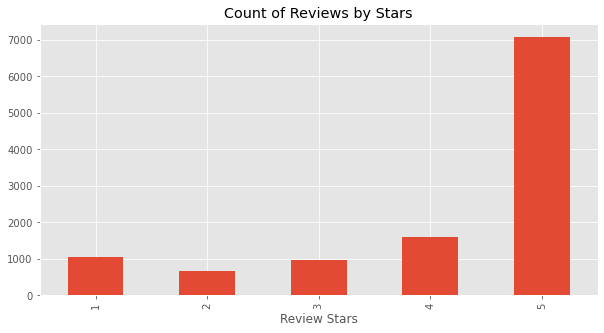

In [22]:
x=r['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',figsize=(10,5))
x.set_xlabel('Review Stars')
plt.show

# Model 1 (VADER SENTIMENT SCORING)

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

vader=SentimentIntensityAnalyzer()

In [25]:
vader.polarity_scores(r['Text'][0])

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [26]:
r['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [27]:
res = {}
for i, row in tqdm(r.iterrows(), total=len(r)):
    text = row['Text']
    myid = row['Id']
    res[myid] = vader.polarity_scores(text)


  0%|          | 0/11375 [00:00<?, ?it/s]

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(r, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,11371,0.043,0.792,0.165,0.9777,B001KPK4XM,A38RWVWOQPYJSA,LiberTEAS,0,0,4,1349568000,Mmm... Banana!,"While they aren't my favorite fruits, I do enj..."
11371,11372,0.022,0.706,0.271,0.9969,B001KPK4XM,A29P51TN9KKMU9,Azzrian,0,0,5,1348790400,Do you Remember Circus Peanuts??,This is one of those matcha that you will want...
11372,11373,0.000,0.873,0.127,0.9056,B00199CE0U,AB09K3IDFV6J9,"S. Datta ""lovetocook""",1,1,5,1225756800,Larry's Beans is great coffee!,We are lucky to have several great coffee roas...
11373,11374,0.000,0.706,0.294,0.9260,B008F8VFBC,A3RLEN577P4E3M,GoodNeighbor,0,0,5,1350518400,Krusteaz Pumpkin Pie Bars,These are the BEST Pumpkin Pie Bars ever! Imp...


# VADER VISUALIZATION

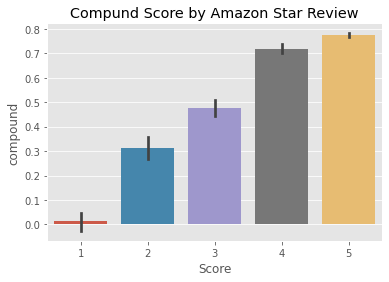

In [29]:
ax = c.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

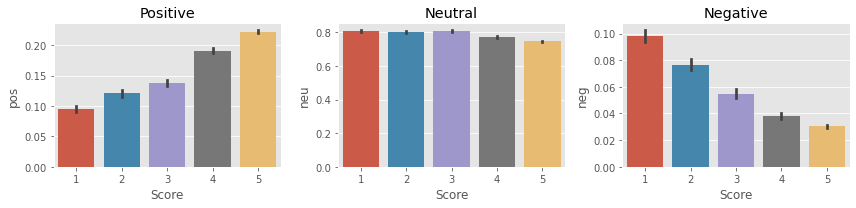

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
c.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
c.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
c.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# MODEL 2 (ROBERTA PRETRAINED MODEL)

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\91701\anaconda\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91701\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [32]:
encoded_text = tokenizer(r['Text'][0], return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.009624246, 'roberta_neu': 0.049980413, 'roberta_pos': 0.9403955}


In [33]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [34]:
res = {}
for i, row in tqdm(r.iterrows(), total=len(r)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = vader.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/11375 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(r, how='left')
r

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
11370,11371,B001KPK4XM,A38RWVWOQPYJSA,LiberTEAS,0,0,4,1349568000,Mmm... Banana!,"While they aren't my favorite fruits, I do enj..."
11371,11372,B001KPK4XM,A29P51TN9KKMU9,Azzrian,0,0,5,1348790400,Do you Remember Circus Peanuts??,This is one of those matcha that you will want...
11372,11373,B00199CE0U,AB09K3IDFV6J9,"S. Datta ""lovetocook""",1,1,5,1225756800,Larry's Beans is great coffee!,We are lucky to have several great coffee roas...
11373,11374,B008F8VFBC,A3RLEN577P4E3M,GoodNeighbor,0,0,5,1350518400,Krusteaz Pumpkin Pie Bars,These are the BEST Pumpkin Pie Bars ever! Imp...


# COMPARE 2 MODELS

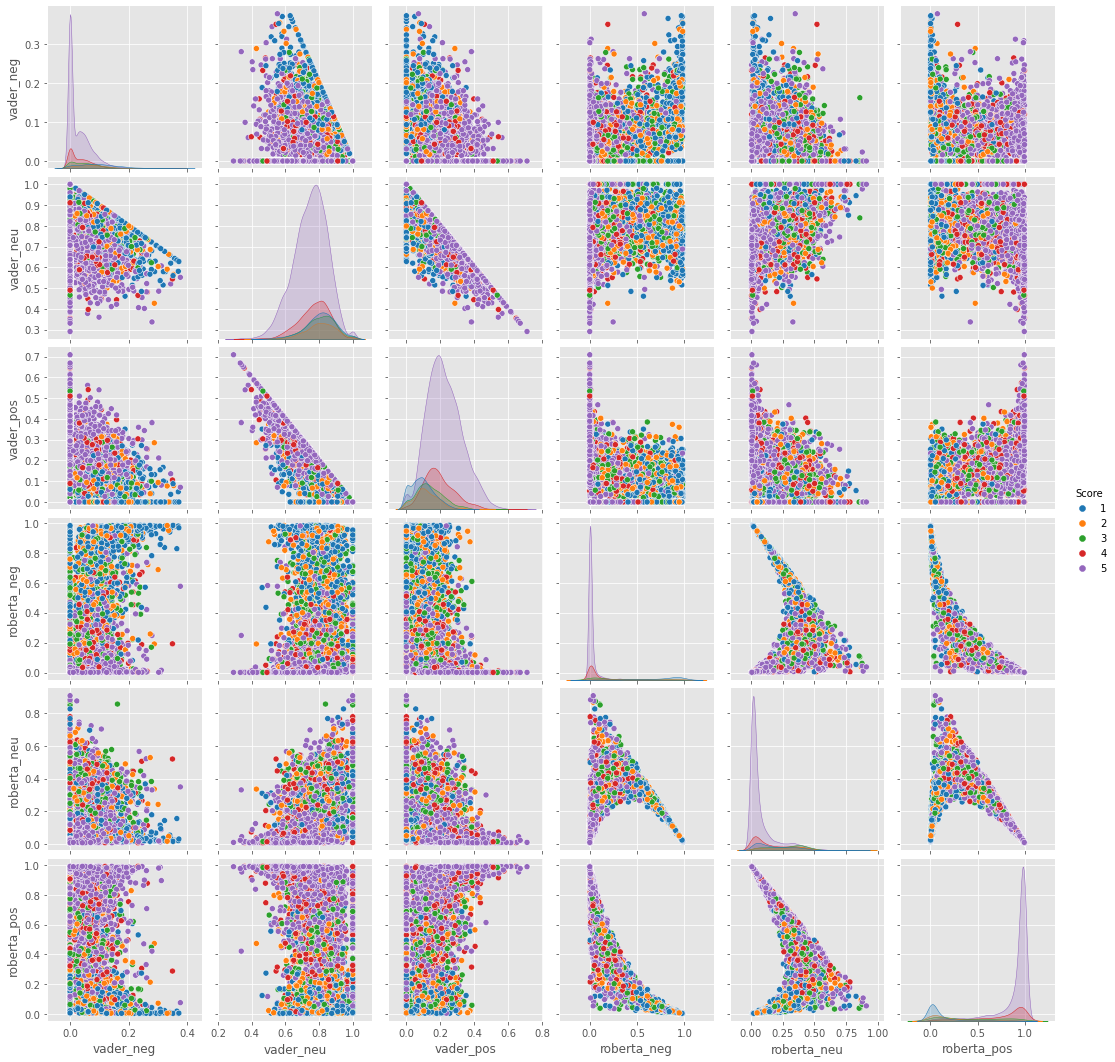

In [36]:
c.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()